# M5のディスプレイ制御を試してみよう

ここでは、AKARIでM5のディスプレイを制御するサンプルを動かしながら、プログラムの書き方を説明します。

## 1. ライブラリのインポートとインスタンスの作成
まずは、M5との通信に使うakari_clientライブラリのインポートをして、AkariClientのインスタンスを作成します。  
この作業を行うことで、モータ制御のための関数を使うことができるようになります。  
importするのは、AkariClientというライブラリです。これは、下記のコマンドでインポートできます。  
 ```python
 # AkariClientのインポート
 from akari_client import AkariClient
 ```  
更に、ディスプレイ制御では、位置を指定する際に使う _Positions_ と、色を指定する際に使う _Color_ , _Colors_クラスもインポートする必要があります。
 ```python
 # 位置を指定する際に使うPositionsのインポート
from akari_client.position import Positions
 # 色を指定する際に使うColors,Colorのインポート
from akari_client.color import Colors, Color
 ```
また、このライブラリを用いて、AkariClientのインスタンスと、m5stackのインスタンスを取得する必要があります。  
 ```python
 # AkariClient、m5stackのインスタンスを取得する
 akari = AkariClient()  
 m5 = akari.m5stack
 ```

まだpythonに詳しくない方は、とりあえず **M5のディスプレイ制御をしたい場合はこのコマンドを実行する必要がある** と覚えておけばOKです。  
次のウインドウを実行して、ライブラリのインポートとインスタンスの作成を行っておきましょう

In [ ]:
# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
 # 位置を指定する際に使うPositionsのインポート
from akari_client.position import Positions
 # 色を指定する際に使うColors,Colorのインポート
from akari_client.color import Colors, Color

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

## 2. ディスプレイの色を変更してみよう
まずはM5のディスプレイの背景色を変更してみましょう。  
背景色を変更するには、_set_display_color()_ を使います。
```python
akari_client.m5stack_client.set_display_color(
        self,
        color: Color,
        sync: bool = True,
    ) -> None:
"""ボディー部M5のディスプレイ背景色を変更する。

Args:
    color: 背景色を指定。色は``color.Colors``から色名を引用する、もしくはRGBの数値指定も可能。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```
また、色はRGB値を指定する方法と、Colorsクラスから色名を指定する方法の両方を使うことができます。

In [ ]:
# 背景色を赤色にする。
m5.set_display_color(Colors.RED)

In [ ]:
# 背景色を(R=50,G=155,B=10)にする。
m5.set_display_color(Color(red=50,green=155,blue=10))

##### 動作例

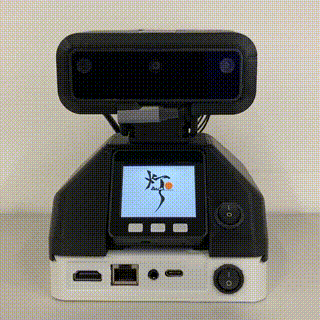

In [48]:
from IPython.display import Image
Image('gif/3_m5_2_demo.gif')

### 練習問題1
背景色を赤、青、黄の順に変更しましょう。それぞれ _Colors.RED_ , _Colors.BLUE_, _Colors.YELLOW_ で色指定できます。

In [ ]:
import time
# 背景色を赤にする処理を書く

time.sleep(1)
# 背景色を青にする処理を書く

time.sleep(1)
# 背景色を黃にする処理を書く

time.sleep(1)


#### 答え

In [ ]:
import time
# 背景色を赤にする処理を書く
m5.set_display_color(Colors.RED,sync=True)
time.sleep(1)
# 背景色を青にする処理を書く
m5.set_display_color(Colors.BLUE,sync=True)
time.sleep(1)
# 背景色を黃にする処理を書く
m5.set_display_color(Colors.YELLOW,sync=True)
time.sleep(1)

##### 動作例

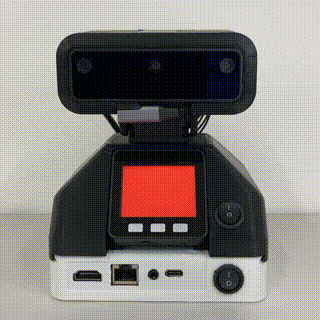

In [49]:
from IPython.display import Image
Image('gif/3_m5_2_rensyu1.gif')

## 3. ディスプレイに文字を表示してみよう
次にM5のディスプレイに文字を表示してみましょう。
文字を表示するには、_set_display_text()_ を使います。

```python
akari_client.m5stack_client.set_display_text(
    self,
    text: str,
    pos_x: int = Positions.CENTER,
    pos_y: int = Positions.CENTER,
    size: int = 5,
    text_color: Optional[Color] = None,
    back_color: Optional[Color] = None,
    refresh: bool = True,
    sync: bool = True,
) -> None:
"""ボディー部M5のディスプレイに文字を表示する。

Args:
    text: 表示する文字列。
    pos_x: x方向の描画位置ピクセルを0-320で指定。左端が0。 ``position.Positions`` を用いた位置指定も可能。デフォルト値は中央揃え。
    pos_y: y方向の描画位置ピクセルを0-240で指定。上端が0。 ``position.Positions`` を用いた位置指定も可能。デフォルト値は中央揃え。
    size: 文字サイズを1-11の11段階で指定。デフォルト値は5。
    text_color: 文字色を指定。色は ``color.Colors`` から色名を引用する、もしくはRGBの数値指定も可能。値を指定しない場合、前回値を引き継ぐ。
    back_color: 背景色を指定。色は ``color.Colors`` から色名を引用する、もしくはRGBの数値指定も可能。値を指定しない場合、画面全体の背景色に合わせる。
    refresh: trueの場合画面全体を元の背景色で更新する。falseの場合は現在の表示を維持しつつ、文字を描画する範囲のみ更新する。デフォルト値は背景更新あり。
    sync: 同期実行の指定。Trueの場合M5側で実行完了するまで関数の終了待ちを行う。

"""

```

下記にディスプレイに文字を表示するサンプルを記載します。

In [ ]:
# AKARIと表示する
m5.set_display_color(Colors.BLACK)
m5.set_display_text("AKARI")

##### 動作例

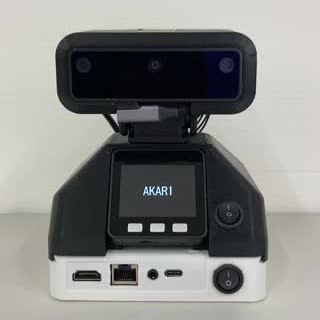

In [50]:
from IPython.display import Image
Image('jpg/3_m5_3_demo1.jpg')

pos_x,pos_yに数値を入れることで表示位置を変更できます。

In [ ]:
# x=120,y=150に表示する
m5.set_display_text(text="AKARI",pos_x=120,pos_y=150)

##### 動作例

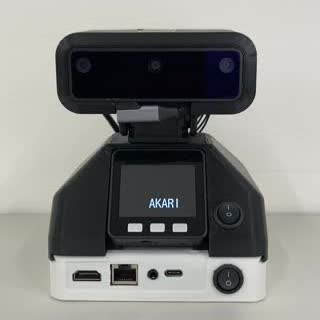

In [51]:
from IPython.display import Image
Image('jpg/3_m5_3_demo2.jpg')

pos_x,pos_yには `Positions` による位置指定も使えます。  
pos_xには`LEFT`, `CENTER`, `RIGHT`、pos_yには`TOP`, `CENTER`, `BOTTOM`が使えます。

In [ ]:
# 右下に表示する
m5.set_display_text(text="AKARI",pos_x=Positions.RIGHT,pos_y=Positions.BOTTOM)

##### 動作例

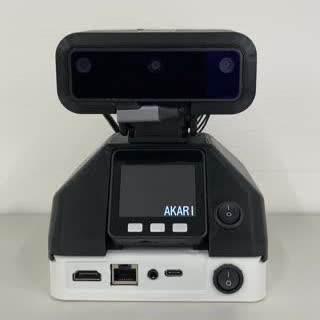

In [52]:
from IPython.display import Image
Image('jpg/3_m5_3_demo3.jpg')

sizeに数値を入れることで文字サイズを変更できます。

In [ ]:
# sizeを6にする
m5.set_display_text(text="AKARI",size=6)

text_color,back_colorを指定することで文字色と文字の背景色を変更できます。  
色はset_display_colorと同様RGB値を指定する方法と、Colorsクラスから色名を指定する方法の両方を使うことができます。

In [ ]:
# 文字の色を赤、背景の色を黒にする
m5.set_display_text(text="AKARI",text_color=Colors.RED,back_color=Colors.BLACK)

##### 動作例

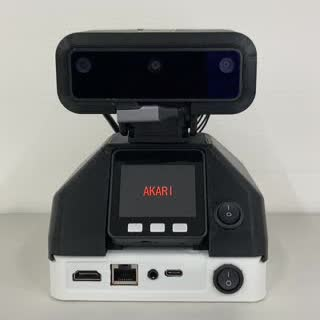

In [53]:
from IPython.display import Image
Image('jpg/3_m5_3_demo4.jpg')

In [ ]:
# 文字の色を(red=10,green=155,blue=10)、背景の色を(red=0,green=100,blue=200)にする
m5.set_display_text(text="AKARI",text_color=Color(red=10,green=155,blue=10),back_color=Color(red=0,green=100,blue=200))

##### 動作例

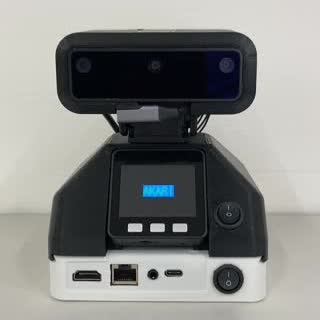

In [54]:
from IPython.display import Image
Image('jpg/3_m5_3_demo5.jpg')

refreshをTrueにするとset_display_textをする前に画面全体を現在の背景色で更新します。defaultはTrueです。  
Falseにすると前回の表示を残したまま文字を描画することができます。

In [ ]:
# x=40,y=50に表示する
m5.set_display_text(text="AKARI",pos_x=40,pos_y=50)
# 一つ前の表示を残したまま、x=80,y=100に表示する
m5.set_display_text(text="AKARI",pos_x=80,pos_y=100,refresh=False)
# 一つ前の表示を残したまま、x=120,y=150に表示する
m5.set_display_text(text="AKARI",pos_x=120,pos_y=150,refresh=False)

##### 動作例

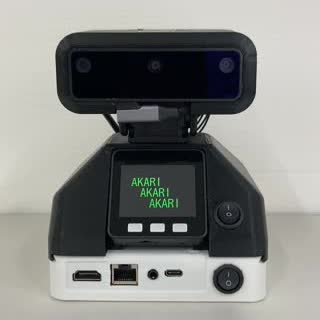

In [55]:
from IPython.display import Image
Image('jpg/3_m5_3_demo6.jpg')

### 練習問題2
下記3つの文字を並べて画面に表示してみましょう。**並べて表示するので、一つ前の描画は消さずに次の文字を描画する必要があります。**  
あか: 文字サイズ4, pos_xは中央揃え、pos_yは上揃え,文字の色は赤  
あお: 文字サイズ4, pos_xは中央揃え、pos_yは中央揃え,文字の色は青  
きいろ: 文字サイズ4, pos_xは中央揃え、pos_yは下揃え,文字の色は黃

In [ ]:
# あかを表示

# あおを表示

# きいろを表示


#### 答え

In [ ]:
# あかを表示
m5.set_display_text(text="あか",pos_x=Positions.CENTER,pos_y=Positions.TOP,size=4,text_color=Colors.RED)
# あおを表示
m5.set_display_text(text="あお",pos_x=Positions.CENTER,pos_y=Positions.CENTER,size=4,text_color=Colors.BLUE,refresh=False)
# きいろを表示
m5.set_display_text(text="きいろ",pos_x=Positions.CENTER,pos_y=Positions.BOTTOM,size=4,text_color=Colors.YELLOW,refresh=False)

##### 動作例

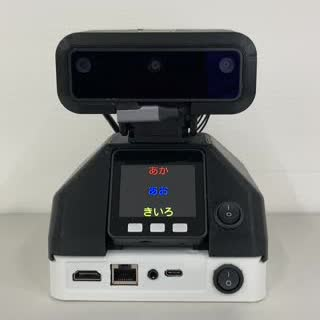

In [56]:
from IPython.display import Image
Image('jpg/3_m5_3_demo7.jpg')

## 4. ディスプレイに画像を表示してみよう
次にM5のディスプレイにSDカード内の画像を表示してみましょう。
画像を表示するには、_set_display_image()_ を使います。

```python
akari_client.m5stack_client.set_display_image(
    self,
    filepath: str,
    pos_x: int = Positions.CENTER,
    pos_y: int = Positions.CENTER,
    scale: float = -1.0,
    sync: bool = True,
) -> None:
"""ボディー部M5のディスプレイにM5のSDカード内の画像を表示する。

Args:
    filepath: M5のSDカード内のファイルパス。(例;"image/hoge.jpg")
    pos_x: x方向の描画位置ピクセルを0-320で指定。左端が0。 ``position.Positions`` を用いた位置指定も可能。デフォルト値は中央揃え。
    pos_y: y方向の描画位置ピクセルを0-240で指定。上端が0。 ``position.Positions`` を用いた位置指定も可能。デフォルト値は中央揃え。
    scale: 画像の拡大縮小倍率を指定。1.0で等倍表示。マイナスの値を入れた場合、画面サイズに合わせて自動でサイズ調整される。
            デフォルト値は自動サイズ調整となっている。
    sync: 同期実行の指定。Trueの場合M5側で実行完了するまで関数の終了待ちを行う。

"""

```

下記にディスプレイに画像を表示するサンプルを記載します。

In [ ]:
# "/logo320_ex.jpg"を表示する
m5.set_display_image("/jpg/logo320_ex.jpg")

##### 動作例

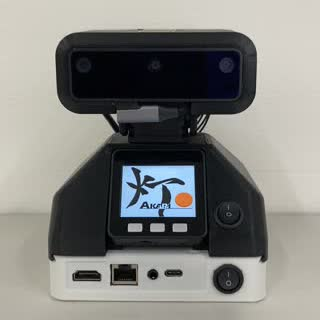

In [57]:
from IPython.display import Image
Image('jpg/3_m5_4_demo1.jpg')

scaleを指定することで、表示倍率を変更できます。

In [ ]:
# "/logo320_ex.jpg"をscale 0.4倍で表示する
m5.set_display_image(filepath="/jpg/logo320_ex.jpg",scale=0.4)

##### 動作例

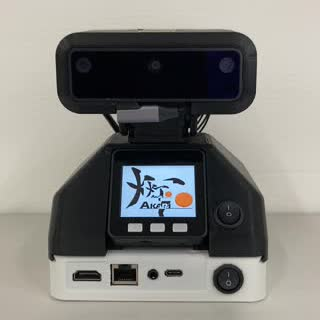

In [58]:
from IPython.display import Image
Image('jpg/3_m5_4_demo2.jpg')

pos_x, pos_yを指定することで、表示位置を変更できます。
また、こちらも `Positions` による位置指定も使えます。  

In [ ]:
# "/logo320_ex.jpg"をscale 0.4倍で右下揃えで表示する
m5.set_display_image(filepath="/jpg/logo320_ex.jpg",scale=0.4,pos_x=Positions.RIGHT,pos_y=Positions.BOTTOM)

##### 動作例

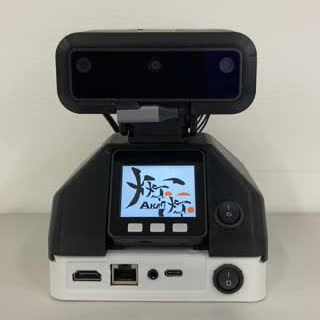

In [59]:
from IPython.display import Image
Image('jpg/3_m5_4_demo3.jpg')

### 練習問題3
"/jpg/logo320.jpg"を左上、真中中央、右下の各場所にscale 0.3倍で表示してみましょう。

In [ ]:
# 左上に表示

# 真中中央に表示

# 右下に表示


#### 答え

In [ ]:
# 左上に表示
m5.set_display_image(filepath="/jpg/logo320.jpg",scale=0.3,pos_x=Positions.LEFT,pos_y=Positions.TOP)
# 真中中央に表示
m5.set_display_image(filepath="/jpg/logo320.jpg",scale=0.3,pos_x=Positions.CENTER,pos_y=Positions.CENTER)
# 右下に表示
m5.set_display_image(filepath="/jpg/logo320.jpg",scale=0.3,pos_x=Positions.RIGHT,pos_y=Positions.BOTTOM)

##### 動作例

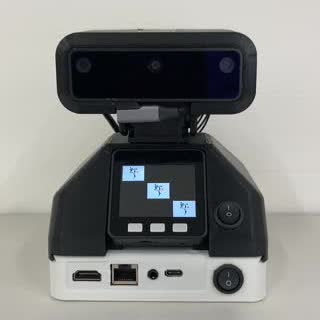

In [60]:
from IPython.display import Image
Image('jpg/3_m5_4_demo4.jpg')

## 5. GPIOピンの出力をしてみよう。
次にM5のヘッドのGPIOピンの出力をしてみましょう。  
AKARIで出力できるGPIOには、デジタル出力(dout)とPWM出力(pwmout)があります。  
デジタル出力の制御には、 _set_dout()_ を使います。
```python
akari_client.m5stack_client.set_dout(self, pin_id: int, value: bool, sync: bool = True) -> None:
"""ヘッド部GPIOピンのデジタル出力を設定する。

Args:
    pin_id: pin番号。0でdout0、1でdout1を指定する。
    value: デジタル出力の値。``False``で0V,``True``で3.3V出力。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```

下記にdout0をHi、dout1をLoにするサンプルを記載します。
テスト用ヘッドモジュールをAKARIに接続している場合は、dout0のLEDが点灯します。

In [ ]:
# dout0をHi
m5.set_dout(pin_id=0,value=True)
# dout1をLo
m5.set_dout(pin_id=1,value=False)

##### 動作例

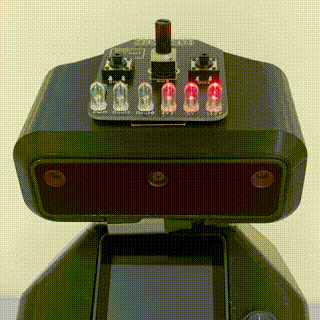

In [61]:
from IPython.display import Image
Image('gif/3_m5_5_demo1.gif')

PWM出力の制御には、 _set_pwmout()_ を使います。
```python
akari_client.m5stack_client.set_pwmout(self, pin_id: int, value: int, sync: bool = True) -> None:
"""ヘッド部GPIOピンのPWM出力を設定する。

Args:
    pin_id: pin番号。デフォルトではpwmout0しかないため、0を指定すること。
    value: PWM出力の値。 0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。
"""
```

下記にpwmout0を255にするサンプルを記載します。
テスト用ヘッドモジュールをAKARIに接続している場合は、pwmout0のLEDが点灯します。

In [ ]:
# pwmout0を255に
m5.set_pwmout(pin_id=0,value=255)

##### 動作例

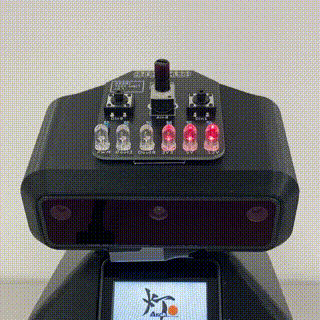

In [62]:
from IPython.display import Image
Image('gif/3_m5_5_demo2.gif')

また、 _set_allout()_ を使うことで、3ピン同時に制御することもできます。
```python
akari_client.m5stack_client.set_allout(
        self,
        *,
        dout0: bool,
        dout1: bool,
        pwmout0: int,
        sync: bool = True,
    ) -> None:
"""ヘッド部GPIOピンの出力をまとめて設定する。

Args:
    dout0: dout0の出力値。``False``で0V,``True``で3.3V出力。
    dout1: dout1の出力値。``False``で0V,``True``で3.3V出力。
    pwmout0: pwmout0の出力値。0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```

下記にdout0をLo,dout1をHi,pwmout0を200にするサンプルを記載します。

In [ ]:
# pwmout0を255に
m5.set_allout(dout0=False,dout1=True,pwmout0=200)

##### 動作例

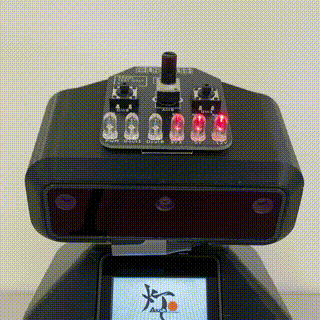

In [63]:
from IPython.display import Image
Image('gif/3_m5_5_demo3.gif')

### 練習問題3
dout0,dout1を1秒ずつ順番にHiにする処理を3回ずつ繰り返す処理を書いてみましょう。

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする処理を書く。

    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする処理を書く。

    # 1秒待つ
    time.sleep(1)

print("終わります。")

#### 答え

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする処理を書く。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする処理を書く。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # 1秒待つ
    time.sleep(1)

print("終わります。")

##### 動作例

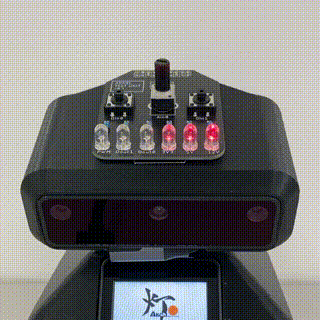

In [64]:
from IPython.display import Image
Image('gif/3_m5_5_rensyu3.gif')

## 6. GPIOピンの出力を確認しよう。
4.でセットしたGPIOピンの出力は _get()_ を使い取得することができます。 GPIOの出力を取得する場合に用いる要素は"dout0", "dout1", "pwmout0"です。
```python
"""
dout0: ヘッドのdout0ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
dout1: ヘッドのdout1ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
pwmout0: ヘッドのpwmout0ピンのPWM出力。0-255の256段階で0-3.3Vを出力可能。
"""
```

下記にdout0, dout1, pwmout0の状態を取得するサンプルを記述します。

In [ ]:
# M5から情報を取得し、dout0, dout1, pwmout0の状態をprintする。
data = m5.get()
print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + ", pwmout0は" + str(data["pwmout0"]) + "です。") 

### 練習問題4
練習問題3に、dout0,dout1の現在値を取得し、printする処理を追加してみましょう。

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    
    # 1秒待つ
    time.sleep(1)

print("終わります。")

#### 答え

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    data = m5.get()
    print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + "です。") 
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    data = m5.get()
    print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + "です。")
    # 1秒待つ
    time.sleep(1)

print("終わります。")

## 7. 環境センサの計測値を確認しよう。
環境線センサの計測した温度、気圧、明るさも _get()_ を使い取得することができます。 温度は"temperature", 気圧は"pressure", 明るさは"brightness"の各要素から取得することができます。
```python
"""
temperature: AKARI側面の環境センサモジュールの温度計測値。単位は℃。  
pressure: AKARI側面の環境センサモジュールの観測絶対圧力。単位はPa。  
brightness: AKARI側面の光センサユニットの観測明るさを4096段階で出力。0が最も明るい。  
"""
```
下記に温度、気圧、明るさの状態を取得するサンプルを記述します。

In [ ]:
# M5から情報を取得し、dout0, dout1, pwmout0の状態をprintする。
data = m5.get()
print("温度は" + str(data["temperature"]) + "℃, 気圧は" + str(data["pressure"]) + "Pa, 明るさは" + str(data["brightness"]) + "です。") 

### 練習問題5
明るさが3500以上になったら"暗いです!"と表示してみましょう(明るさ値は暗いほど高くなります)。  
AKARIのボディー側面の光センサユニットを指で覆うと明るさの値が高くなります。

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # m5からセンサを取得する処理を書く
    
    # 明るさが3500以上だった場合"暗いです！"と表示する処理を、if文を用いて書く
    
    # 1秒待つ
    time.sleep(1)
print("終わります。")

#### 答え

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # m5からセンサを取得する処理を書く
    data = m5.get()
    # 明るさが3500以上だった場合"暗いです！"と表示する処理を、if文を用いて書く
    if(data["brightness"]>=3500):
        print("暗いです！")
    # 1秒待つ
    time.sleep(1)
print("終わります。")

## 最後に
以上でM5との通信のチュートリアルは終わりです。  
その他にもいくつかのAPIがあります。詳しくは[SDKリファレンス](https://akari-docs.vbcpp.net/source/sdk_reference/akari_client/joint.html#)を参照ください。  
次はM5のディスプレイ制御について説明します。